<a href="https://colab.research.google.com/github/kavya6785/job-application/blob/main/kovai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("/content/Daily_Public_Transport_Passenger_Boardings_By_Ticket_Type_20240513.csv")


In [ ]:
print(data.head())
print(data.info())


         Date  MyWay  Paper Ticket
0  01/07/2019  66215          4325
1  15/09/2023  63800          7349
2  28/12/2021   9994          1882
3  11/01/2023  43769          3991
4  11/09/2021   3810           685
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778 entries, 0 to 1777
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1778 non-null   object
 1   MyWay         1778 non-null   int64 
 2   Paper Ticket  1778 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 41.8+ KB
None


In [ ]:
print(data.isnull().sum())


Date            0
MyWay           0
Paper Ticket    0
dtype: int64


In [ ]:
data = data.drop_duplicates()


In [ ]:
print(data.describe())


              MyWay  Paper Ticket
count   1778.000000   1778.000000
mean   40985.889201   3744.153543
std    23275.162569   2153.562760
min        0.000000     13.000000
25%    17207.750000   1991.500000
50%    45079.500000   3374.500000
75%    60946.500000   5383.000000
max    88313.000000  10310.000000


In [ ]:
filtered_data = data[(data['Date'] >= '2023-04-01') & (data['Date'] <= '2024-04-30')]
print(filtered_data.head())
print(filtered_data.info())





         Date  MyWay  Paper Ticket
1  2023-09-15  63800          7349
10 2023-08-29  69155          6507
19 2023-04-11  50246          4306
27 2023-09-17  19207          2368
33 2023-10-07  24249          3089
<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 1 to 1777
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          396 non-null    datetime64[ns]
 1   MyWay         396 non-null    int64         
 2   Paper Ticket  396 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 12.4 KB
None


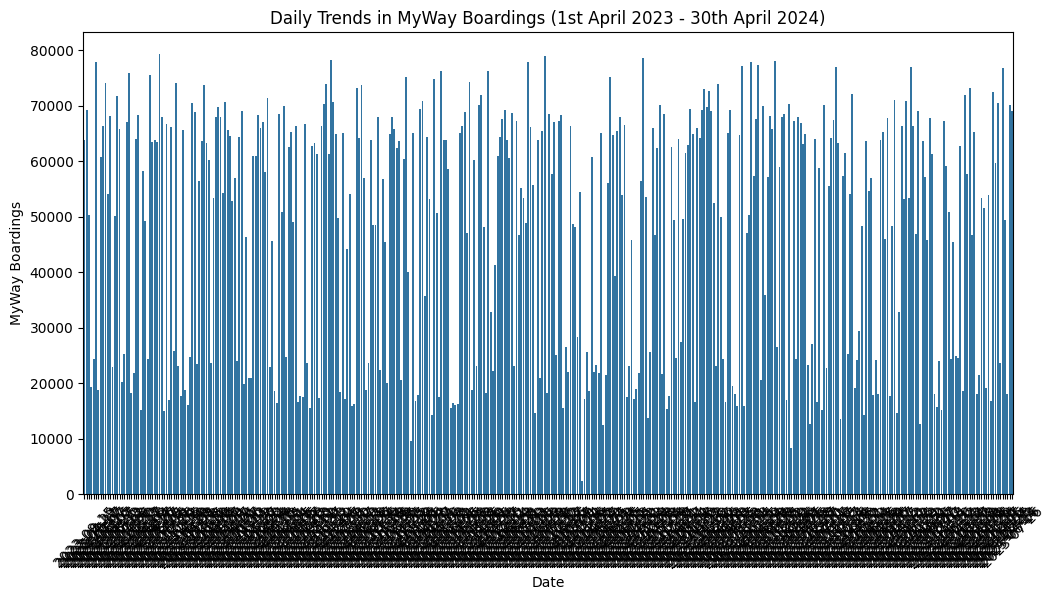

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='MyWay', data=filtered_data)
plt.title('Daily Trends in MyWay Boardings (1st April 2023 - 30th April 2024)')
plt.xlabel('Date')
plt.ylabel('MyWay Boardings')
plt.xticks(rotation=45)
plt.show()



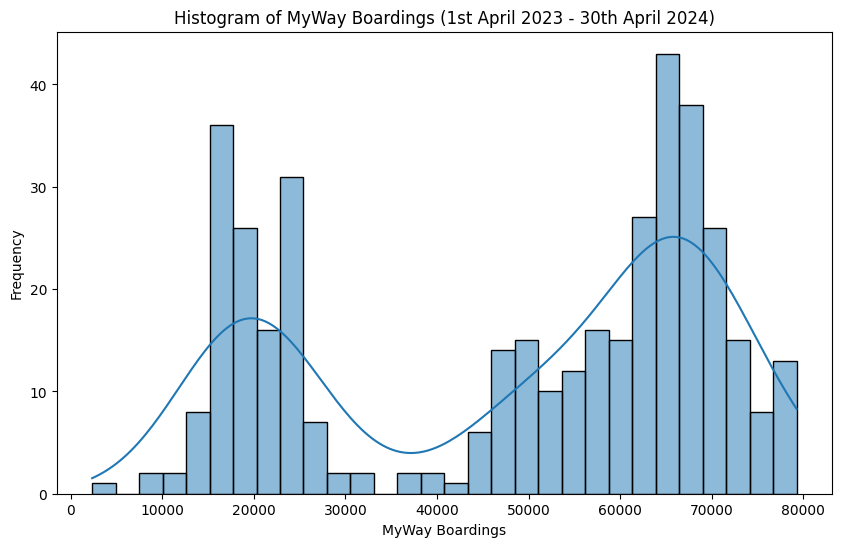

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x='MyWay', bins=30, kde=True)
plt.title('Histogram of MyWay Boardings (1st April 2023 - 30th April 2024)')
plt.xlabel('MyWay Boardings')
plt.ylabel('Frequency')
plt.show()


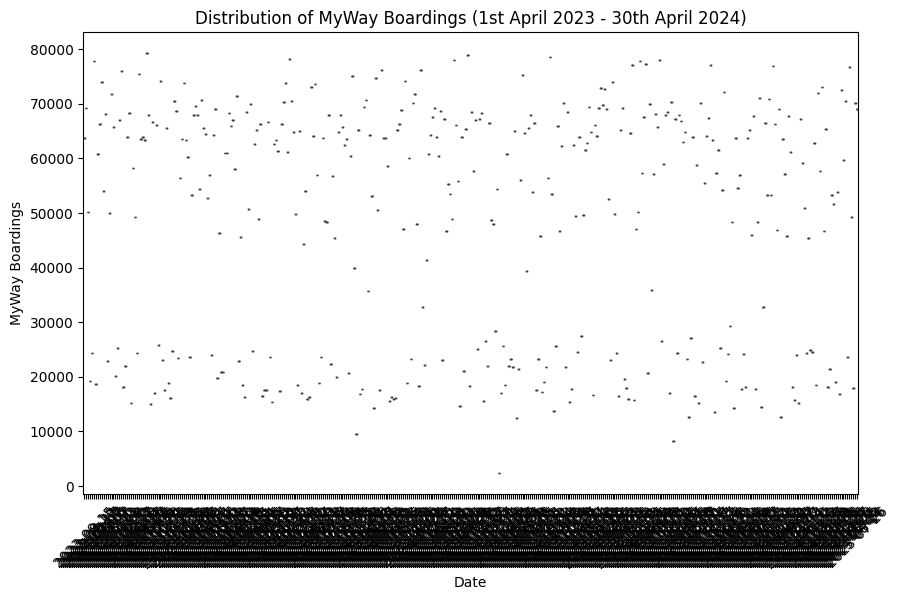

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Date', y='MyWay', data=filtered_data)
plt.title('Distribution of MyWay Boardings (1st April 2023 - 30th April 2024)')
plt.xlabel('Date')
plt.ylabel('MyWay Boardings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')




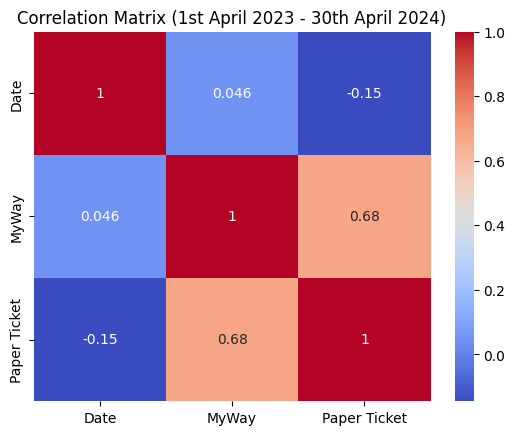

In [ ]:
correlation_matrix = filtered_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (1st April 2023 - 30th April 2024)')
plt.show()


In [ ]:
TASK 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [ ]:
data = pd.read_csv("/content/Daily_Public_Transport_Passenger_Boardings_By_Ticket_Type_20240513.csv")


In [ ]:
# Convert 'Date' column to datetime with correct format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')


In [ ]:
prediction_data = data[(data['Date'] >= '2024-05-01') & (data['Date'] <= '2024-05-07')][['Date', 'MyWay']].copy()



In [ ]:
X = prediction_data.index.values.reshape(-1, 1)  # Using index values as features
y = prediction_data['MyWay']


In [ ]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [ ]:
reference_date = data['Date'].min()  # Use the minimum date in your dataset as the reference date
next_week_dates = pd.date_range(start='2024-05-01', end='2024-05-07')
next_week_days_since_reference = (next_week_dates - reference_date).days.values.reshape(-1, 1)


In [ ]:
next_week_predictions = model.predict(next_week_days_since_reference)




In [ ]:
print("Date\t\tPredicted MyWay Patronage")
for date, prediction in zip(next_week_dates, next_week_predictions):
    print(f"{date.strftime('%Y-%m-%d')}:\t{prediction}")


Date		Predicted MyWay Patronage
2024-05-01:	75575.28014257544
2024-05-02:	75606.69232993718
2024-05-03:	75638.10451729894
2024-05-04:	75669.5167046607
2024-05-05:	75700.92889202244
2024-05-06:	75732.34107938419
2024-05-07:	75763.75326674595


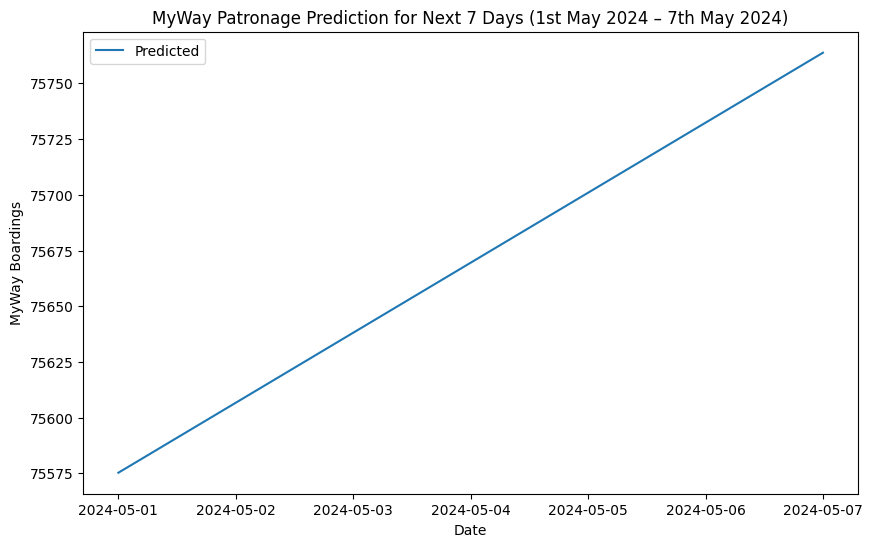

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(next_week_dates, next_week_predictions, label='Predicted')
plt.title('MyWay Patronage Prediction for Next 7 Days (1st May 2024 – 7th May 2024)')
plt.xlabel('Date')
plt.ylabel('MyWay Boardings')
plt.legend()
plt.show()


Date		Actual		Predicted
2024-05-01:	74611		75575.28014257544
2024-05-02:	73656		75606.69232993718
2024-05-03:	70261		75638.10451729894
2024-05-04:	24412		75669.5167046607
2024-05-05:	16352		75700.92889202244
2024-05-06:	68768		75732.34107938419
2024-05-07:	72711		75763.75326674595


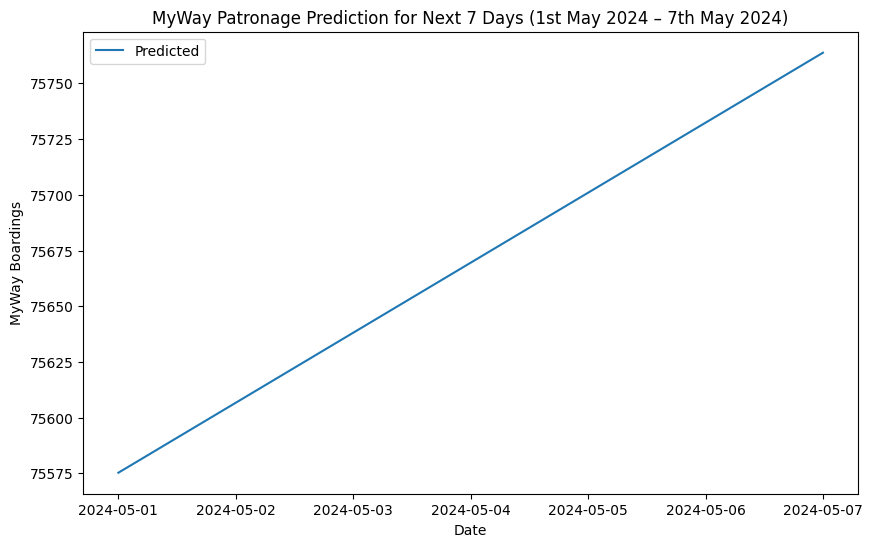

In [ ]:

reference_date = data['Date'].min()
next_week_dates = pd.date_range(start='2024-05-01', end='2024-05-07')
next_week_days_since_reference = (next_week_dates - reference_date).days.values.reshape(-1, 1)

next_week_predictions = model.predict(next_week_days_since_reference)


print("Date\t\tActual\t\tPredicted")
for date, prediction in zip(next_week_dates, next_week_predictions):
    actual_value = data[data['Date'] == date]['MyWay'].values[0]
    print(f"{date.strftime('%Y-%m-%d')}:\t{actual_value}\t\t{prediction}")
plt.figure(figsize=(10, 6))
plt.plot(next_week_dates, next_week_predictions, label='Predicted')
plt.title('MyWay Patronage Prediction for Next 7 Days (1st May 2024 – 7th May 2024)')
plt.xlabel('Date')
plt.ylabel('MyWay Boardings')
plt.legend()
plt.show()
